In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
excel = pd.read_excel("data/Bayreuth Digital Science Conference_Abstracts.xlsx")

In [4]:
excel.columns

Index(['Timestamp',
       'Submitting author email (preferably in the format bt12345678@myubt.de) - the submitting author in this case receives email notification of acceptance and details of organisation of the posters, and is also our primary contact point. ',
       'Title (in English)',
       'Comma separated list of authors (e.g. Ali Bonneau, Christina Dorian, Emilia Fu)',
       'Abstract (in English, up to 300 words). Please avoid using special characters or symbols (such as \,{,/,},%,§,etc) as these may interfere with our automated text processing.',
       'Faculties or “Forschungsstelle” or “Forschungszentrum” in the University of Bayreuth where authors were based, as well as collaborations beyond the university in Germany and the World. Please tick all boxes \nthat apply for this work (encompassing all authors)',
       'Keywords', 'Group'],
      dtype='object')

In [5]:
Faks = excel['Faculties or “Forschungsstelle” or “Forschungszentrum” in the University of Bayreuth where authors were based, as well as collaborations beyond the university in Germany and the World. Please tick all boxes \nthat apply for this work (encompassing all authors)']

In [16]:
temp = []

In [17]:
for Fak in Faks:
    for f in Fak.split(","):
        temp.append(f.strip().strip("“”"))

In [18]:
temp = pd.Series(temp)
temp.sort_values().unique()

array(['External German', 'External World', 'Faculty 1', 'Faculty 2',
       'Faculty 3', 'Faculty 4', 'Faculty 5', 'Faculty 6', 'Faculty 7',
       'Forschungsstelle', 'Forschungszentrum'], dtype=object)

In [20]:
aggregated = {
    "Faculty 1": 0,
    "Faculty 2": 0,
    "Faculty 3": 0,
    "Faculty 4": 0,
    "Faculty 5": 0,
    "Faculty 6": 0,
    "Faculty 7": 0,
    "Forschungsstelle": 0,
    "Forschungszentrum": 0,
    "External German": 0,
    "External World": 0
}

In [21]:
for Fak in Faks:
    for f in Fak.split(","):
        f = f.strip().strip("“”")
        aggregated[f] += 1

In [22]:
aggregated

{'Faculty 1': 30,
 'Faculty 2': 10,
 'Faculty 3': 13,
 'Faculty 4': 10,
 'Faculty 5': 3,
 'Faculty 6': 8,
 'Faculty 7': 18,
 'Forschungsstelle': 6,
 'Forschungszentrum': 6,
 'External German': 9,
 'External World': 17}

Text(0, 0.5, 'Number of Abstracts')

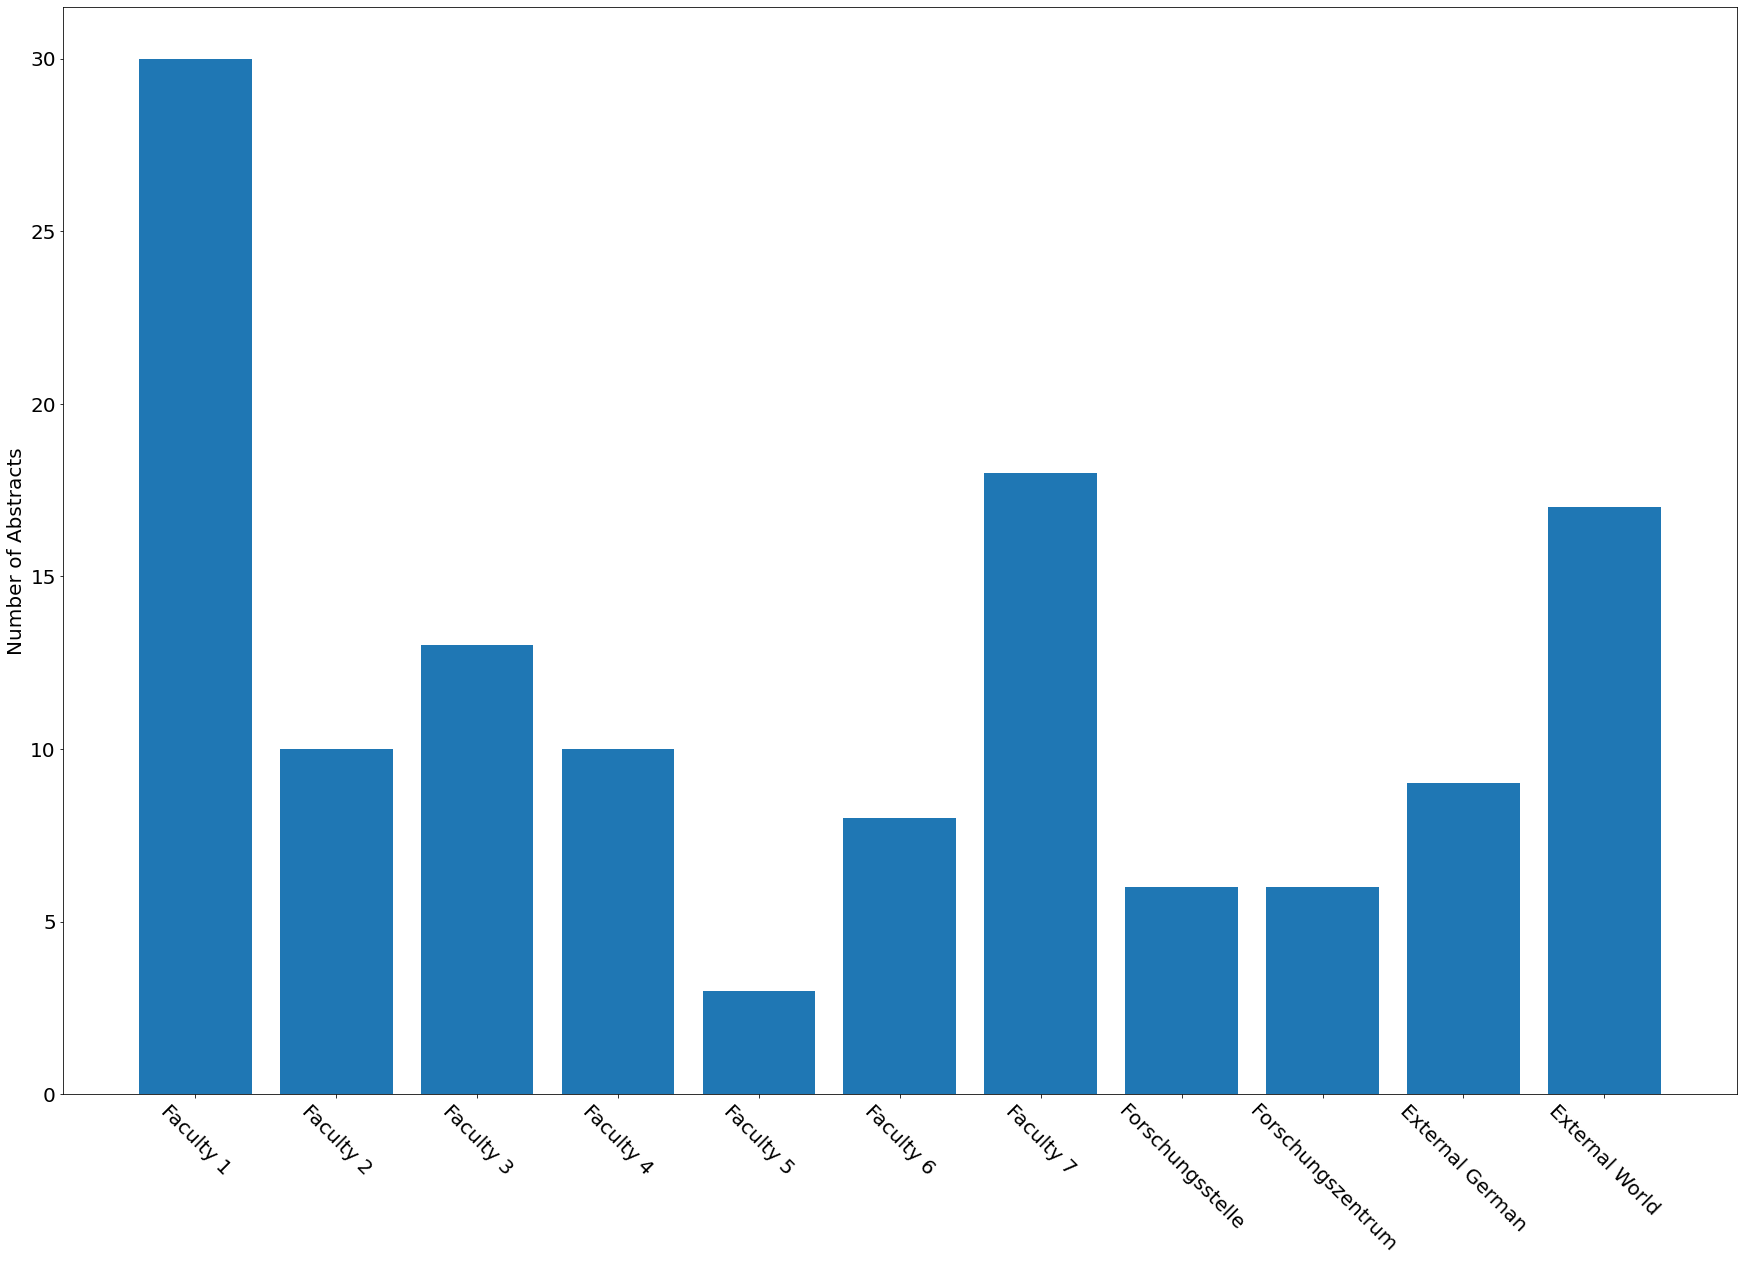

In [34]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.bar(aggregated.keys(), aggregated.values())
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
ax.tick_params(axis='x', which='major', rotation=-45)
ax.set_ylabel("Number of Abstracts", fontsize=20)